In [77]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
import sklearn.metrics as metrics


In [78]:
def regressionMetrics(y, yhat):
    res = {
        'MSE': metrics.mean_squared_error(y, yhat),
        'RMSE': np.sqrt(metrics.mean_squared_error(y, yhat)),
        'MAE': metrics.mean_absolute_error(y, yhat),
        'R2': metrics.r2_score(y, yhat)
    }

    # Check if all values are > -1 to safely apply log
    if np.all(y > -1) and np.all(yhat > -1):
        rmsle = np.sqrt(metrics.mean_squared_log_error(y, yhat))
        res['RMSLE'] = rmsle
    else:
        res['RMSLE'] = 'Not applicable (values ≤ -1)'

    return res

In [111]:
model_lst =pd.DataFrame()

In [3]:
SPY = pd.read_pickle('SPY')

In [ ]:
# Important to rename as follow
SPY = SPY.rename(columns={'Date':'ds','SPY_Close':'y'})

SPY.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1317 entries, 0 to 1316
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1317 non-null   datetime64[ns]
 1   y       1317 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 20.7 KB


In [33]:
SPY_cut = SPY.iloc[:-15] # to compare the prediction
SPY_cut.tail()

,ds,y
1297,2025-03-03,582.019165
1298,2025-03-04,575.129883
1299,2025-03-05,581.311279
1300,2025-03-06,570.992371
1301,2025-03-07,574.192688


In [36]:

model=Prophet(interval_width=0.9)
model.fit(SPY_cut)


15:10:18 - cmdstanpy - INFO - Chain [1] start processing
15:10:19 - cmdstanpy - INFO - Chain [1] done processing


In [37]:
future = model.make_future_dataframe(periods=15,freq='D')
forecast = model.predict(future)

In [38]:
# Keep only the forecast for the 15 future dates
forecast_future = forecast[forecast['ds'] > SPY_cut['ds'].max()]

In [47]:
actual = SPY.iloc[-15:].reset_index(drop=True)
compare_df = actual.copy()
compare_df[['yhat', 'yhat_lower', 'yhat_upper']] = forecast_future[['yhat', 'yhat_lower', 'yhat_upper']].values


In [48]:
print(compare_df.head())

          ds           y        yhat  yhat_lower  yhat_upper
0 2025-03-10  558.898743  594.991150  577.848451  612.532296
1 2025-03-11  554.252686  594.922984  578.028459  613.069326
2 2025-03-12  557.193848  598.038946  580.606391  616.506605
3 2025-03-13  549.766174  598.123228  579.616675  615.450621
4 2025-03-14  561.122009  598.396333  581.313914  614.313050


In [ ]:
returns =compare_df.copy()
returns[['y','yhat', 'yhat_lower', 'yhat_upper']] = returns[['y','yhat', 'yhat_lower', 'yhat_upper']].pct_change()*100



          ds         y      yhat  yhat_lower  yhat_upper
0 2025-03-10       NaN       NaN         NaN         NaN
1 2025-03-11 -0.831288 -0.011457    0.031151    0.087674
2 2025-03-12  0.530654  0.523759    0.445987    0.560667
3 2025-03-13 -1.333050  0.014093   -0.170463   -0.171285
4 2025-03-14  2.065575  0.045660    0.292821   -0.184835
5 2025-03-17  0.771138  0.032347    0.069061    0.397537
6 2025-03-18 -1.080846  0.081456   -0.219087   -0.134512
7 2025-03-19  1.089088 -0.429297   -0.227977   -0.108980
8 2025-03-20 -0.289173  0.096453   -0.091588   -0.035847
9 2025-03-21  0.032986  0.626484    0.618392    0.507326


## In presantage change:

In [50]:
print(returns.head(10)) 

          ds         y      yhat  yhat_lower  yhat_upper
0 2025-03-10       NaN       NaN         NaN         NaN
1 2025-03-11 -0.831288 -0.011457    0.031151    0.087674
2 2025-03-12  0.530654  0.523759    0.445987    0.560667
3 2025-03-13 -1.333050  0.014093   -0.170463   -0.171285
4 2025-03-14  2.065575  0.045660    0.292821   -0.184835
5 2025-03-17  0.771138  0.032347    0.069061    0.397537
6 2025-03-18 -1.080846  0.081456   -0.219087   -0.134512
7 2025-03-19  1.089088 -0.429297   -0.227977   -0.108980
8 2025-03-20 -0.289173  0.096453   -0.091588   -0.035847
9 2025-03-21  0.032986  0.626484    0.618392    0.507326


In [35]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(20))
print(SPY.iloc[-10:])

             ds        yhat  yhat_lower  yhat_upper
1297 2025-03-03  599.727719  582.852367  616.079223
1298 2025-03-04  599.202787  582.051928  617.266486
1299 2025-03-05  598.841993  581.559403  615.590998
1300 2025-03-06  598.385939  582.222368  614.914931
1301 2025-03-07  598.217184  581.544774  616.050354
1302 2025-03-08  594.991150  577.729897  613.708228
1303 2025-03-09  594.922984  577.530714  611.795435
1304 2025-03-10  598.038946  580.209821  615.987521
1305 2025-03-11  598.123228  581.439822  615.423029
1306 2025-03-12  598.396333  580.837016  615.053910
1307 2025-03-13  598.589895  580.902778  615.680861
1308 2025-03-14  599.077485  582.544511  616.042746
1309 2025-03-15  596.505666  579.193239  613.699767
1310 2025-03-16  597.081011  579.248143  613.899764
1311 2025-03-17  600.821627  582.781756  620.397212
1312 2025-03-18  601.504097  583.845955  617.881073
1313 2025-03-19  602.341975  584.886345  618.197677
1314 2025-03-20  603.060693  586.960094  620.474657
1315 2025-03

## Add seasonality

In [42]:
model2 = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False
)

# Optional: Add custom monthly seasonality (explicitly)
model2.add_seasonality(name='monthly', period=30.5, fourier_order=5)

model2.fit(SPY)  # SPY must have columns 'ds' and 'y'


16:17:56 - cmdstanpy - INFO - Chain [1] start processing
16:17:56 - cmdstanpy - INFO - Chain [1] done processing


In [43]:
future = model2.make_future_dataframe(periods=0)  # No extra future steps needed for component analysis
forecast = model2.predict(future)


In [81]:
SPY_reg = SPY.copy()
SPY_reg = SPY_reg.merge(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], on='ds')

In [93]:
print(SPY_reg.tail())

print(regressionMetrics(SPY_reg['y'],SPY_reg['yhat']))
print('metrics using yhat_lower:')
print(regressionMetrics(SPY_reg['y'],SPY_reg['yhat_lower']))

             ds           y        yhat  yhat_lower  yhat_upper
1312 2025-03-24  574.080017  588.334702  574.585475  601.488930
1313 2025-03-25  575.460022  589.532229  576.161836  603.469512
1314 2025-03-26  568.590027  590.769496  577.038819  604.330594
1315 2025-03-27  567.080017  591.887527  578.577200  605.605022
1316 2025-03-28  555.659973  592.898380  578.270366  606.337452
{'MSE': 113.87431049466748, 'RMSE': np.float64(10.671190678395147), 'MAE': 7.869391316686885, 'R2': 0.9851382038988608, 'RMSLE': np.float64(0.028848092244414557)}
metrics using yhat_lower:
{'MSE': 300.3661204424531, 'RMSE': np.float64(17.331073839853463), 'MAE': 15.162965397933494, 'R2': 0.9607990597851742, 'RMSLE': np.float64(0.04499599999541474)}


In [113]:
model_dict = {'model': 'linear'}
new_row = pd.DataFrame([{**model_dict,**regressionMetrics(SPY_reg['y'],SPY_reg['yhat'])}])
model_lst = pd.concat([model_lst,new_row],ignore_index=True)
model_lst

,model,MSE,RMSE,MAE,R2,RMSLE
0,linear,113.87431,10.671191,7.869391,0.985138,0.028848


# By presantage 

Overall seems like the linear model looks better


In [97]:
return_reg = SPY_reg[['y','yhat']].pct_change()*100
return_reg =return_reg.iloc[1:]
return_reg.tail(20)
#print(regressionMetrics(return_reg['y'],return_reg['yhat']))

,y,yhat
1297,-1.751995,-0.435618
1298,-1.183686,-0.217055
1299,1.074783,-0.211591
1300,-1.775109,-0.161940
1301,0.560483,-0.098169
1302,-2.663556,-0.167287
1303,-0.831288,-0.064789
1304,0.530654,-0.045695
1305,-1.333050,-0.012058
1306,2.065575,0.019231


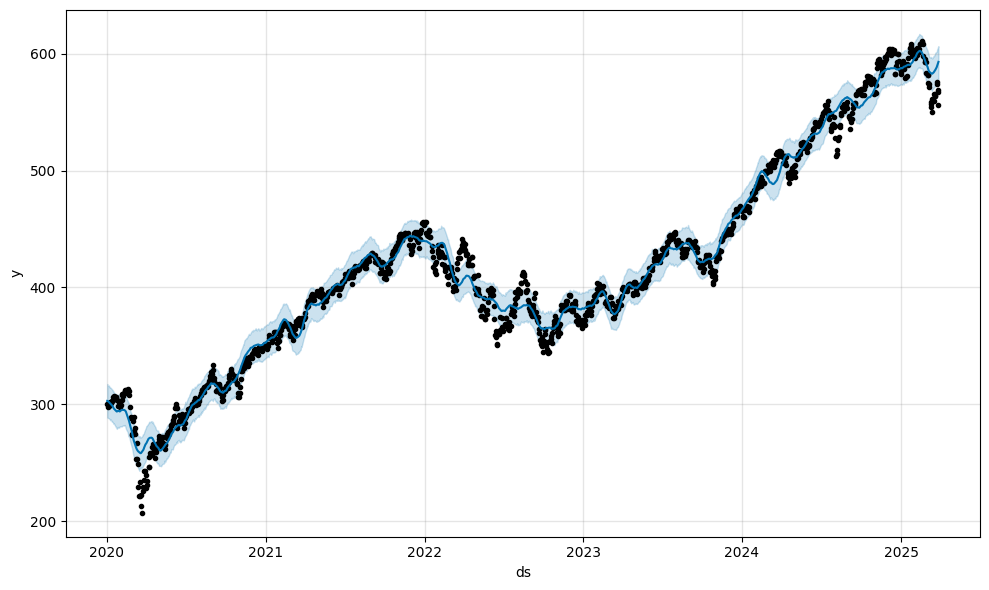

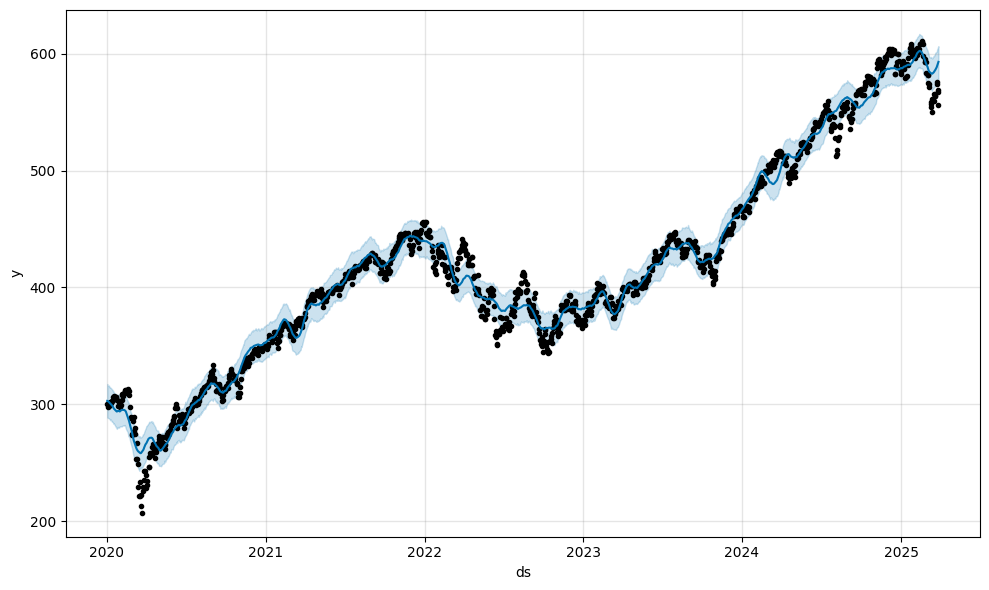

In [63]:
model2.plot(forecast)

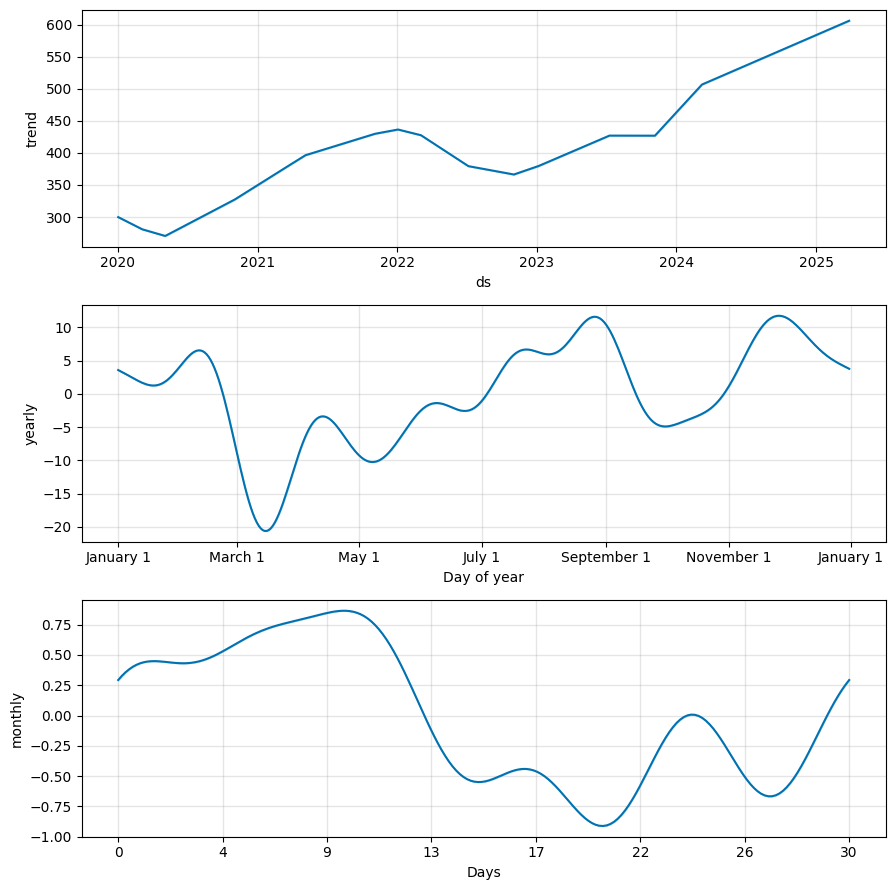

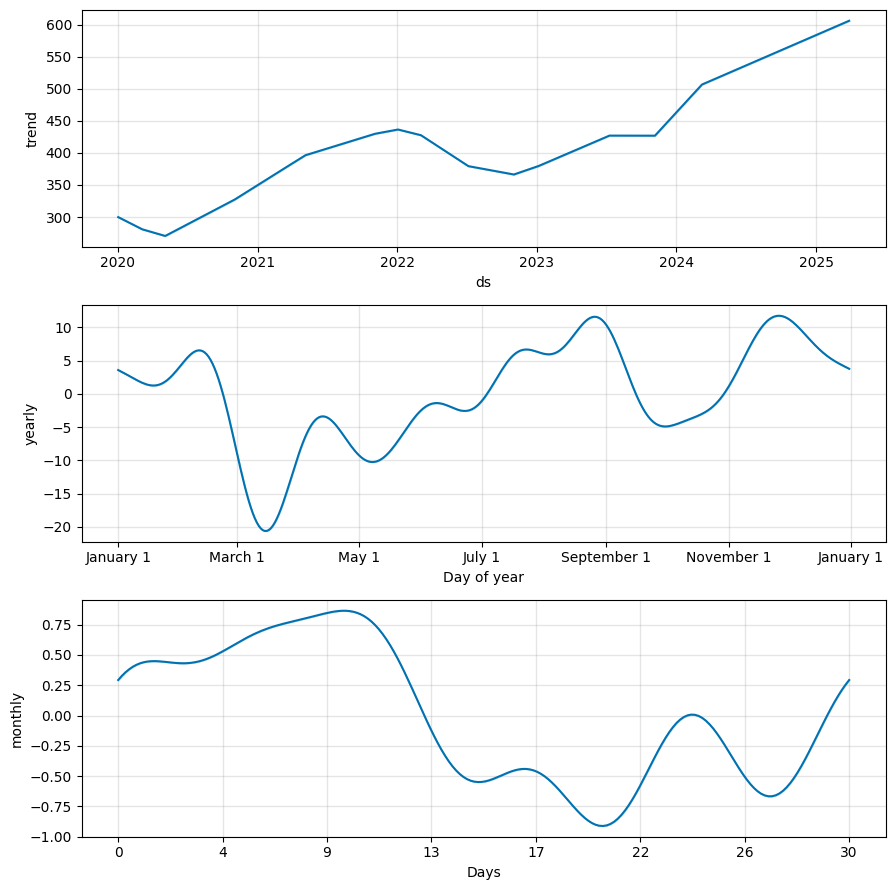

In [44]:
model2.plot_components(forecast)


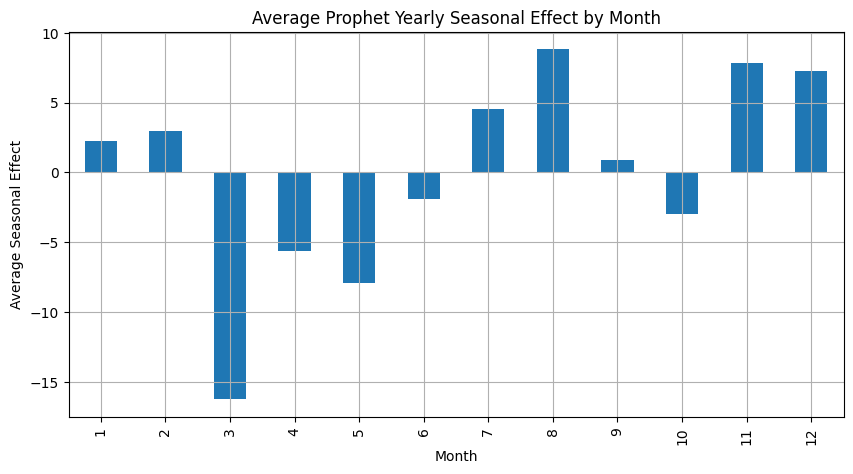

In [52]:
# Extract month from 'ds'
forecast['month'] = forecast['ds'].dt.month

# Average predicted seasonal effect (yhat) by month
monthly_seasonality = forecast.groupby('month')['yearly'].mean()

# Plot
monthly_seasonality.plot(kind='bar', title='Average Prophet Yearly Seasonal Effect by Month', figsize=(10,5))
plt.xlabel('Month')
plt.ylabel('Average Seasonal Effect')
plt.grid(True)
plt.show()


In [59]:
monthly_seasonality.head()
dict_ = {idx: value for idx, value in zip(monthly_seasonality.index,monthly_seasonality.values)}


In [60]:
dict_

{1: np.float64(2.241736136672627),
 2: np.float64(2.944477189600498),
 3: np.float64(-16.265477703881555),
 4: np.float64(-5.656670816818297),
 5: np.float64(-7.904311659282658),
 6: np.float64(-1.9400169215996552),
 7: np.float64(4.506490658677141),
 8: np.float64(8.797654499915472),
 9: np.float64(0.9006554739495233),
 10: np.float64(-3.0181945414575733),
 11: np.float64(7.833681722991881),
 12: np.float64(7.22258069658689)}

In [53]:
SPY_monthly_comp = SPY.copy()
SPY_monthly_comp['month'] = SPY_monthly_comp['ds'].dt.month
SPY_monthly_comp.head()

,ds,y,month
0,2020-01-02,300.291565,1
1,2020-01-03,298.017761,1
2,2020-01-06,299.154633,1
3,2020-01-07,298.313477,1
4,2020-01-08,299.903412,1


## Created DF with seasonality to add for later

In [98]:
SPY_monthly_comp['season'] = SPY_monthly_comp['month'].map(dict_)
SPY_monthly_comp.to_pickle('add_seasonality')

In [62]:
SPY_monthly_comp.tail()

,ds,y,month,season
1312,2025-03-24,574.080017,3,-16.265478
1313,2025-03-25,575.460022,3,-16.265478
1314,2025-03-26,568.590027,3,-16.265478
1315,2025-03-27,567.080017,3,-16.265478
1316,2025-03-28,555.659973,3,-16.265478


# Logistics reggression

In [66]:
SPY_log = SPY.copy() # for logistic reggression

In [135]:
SPY_log['cap'] = SPY_log['y'].max() *1.2 # cilling of 10% present above the max
SPY_log['floor'] = SPY_log['y'].min()

In [69]:
model_log =Prophet(growth='logistic',interval_width=0.9)
model_log.fit(SPY_log)
future_log = model_log.make_future_dataframe(periods=0,freq='D')
future_log['cap'] = SPY_log['cap'].iloc[0]
future_log['floor'] = SPY_log['floor'].iloc[0]
forecast_log = model.predict(future_log)

17:53:12 - cmdstanpy - INFO - Chain [1] start processing
17:53:12 - cmdstanpy - INFO - Chain [1] done processing


In [70]:
print(forecast_log[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

             ds        yhat  yhat_lower  yhat_upper
1312 2025-03-24  606.902780  589.375089  623.944516
1313 2025-03-25  607.849733  589.975607  625.514851
1314 2025-03-26  608.893872  591.379116  627.851600
1315 2025-03-27  609.760701  592.361062  627.214528
1316 2025-03-28  610.819311  593.312487  628.518761


In [121]:
compare_log = SPY_log[['ds','y']]
compare_log = compare_log.merge(forecast_log[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], on='ds')


In [90]:
print(compare_log.tail())
print(regressionMetrics(compare_log['y'],compare_log['yhat']))

             ds           y        yhat  yhat_lower  yhat_upper
1312 2025-03-24  574.080017  606.902780  589.375089  623.944516
1313 2025-03-25  575.460022  607.849733  589.975607  625.514851
1314 2025-03-26  568.590027  608.893872  591.379116  627.851600
1315 2025-03-27  567.080017  609.760701  592.361062  627.214528
1316 2025-03-28  555.659973  610.819311  593.312487  628.518761
{'MSE': 128.52647302488637, 'RMSE': np.float64(11.336951663691893), 'MAE': 8.128458494610646, 'R2': 0.9832259424676483, 'RMSLE': np.float64(0.03007029373110572)}


In [114]:
model_dict = {'model': 'logistics'}
new_row = pd.DataFrame([{**model_dict,**regressionMetrics(compare_log['y'],compare_log['yhat'])}])
model_lst = pd.concat([model_lst,new_row],ignore_index=True)
model_lst

,model,MSE,RMSE,MAE,R2,RMSLE
0,linear,113.874310,10.671191,7.869391,0.985138,0.028848
1,logistics,128.526473,11.336952,8.128458,0.983226,0.030070


In [123]:
compare_log_return = compare_log[['y','yhat']].pct_change()*100
compare_log_return.head(20)

,y,yhat
0,NaN,NaN
1,-0.757199,-0.149811
2,0.381478,-0.549180
3,-0.281178,-0.206875
4,0.532975,-0.178826
5,0.678065,-0.237922
6,-0.287764,-0.171008
7,0.687696,-0.571983
8,-0.152438,-0.196779
9,0.225981,-0.157799


# Regular model with holidays

In [188]:
events = pd.read_csv(r'cpi_release_dates_2020_2025.csv')
events =events.rename(columns={'Date':'ds','event':'holiday'})
events['ds'] = pd.to_datetime(events['ds'], format='%Y-%m-%d')
events = events[['ds','holiday']]


events.head()
#SPY.head()

,ds,holiday
0,2020-01-03,ISM Manufacturing PMI
1,2020-01-10,Nonfarm Payroll
2,2020-01-14,PPI
3,2020-01-14,CPI
4,2020-01-29,FOMC Meeting


In [181]:
#events.isna().sum()
#print(events['ds'].isna().sum()) # check if there are any missing values in the date column
#print(events.loc[events['ds'].isna()]) # check the rows with missing values
print(events.head())

          ds                holiday
0 2020-01-03  ISM Manufacturing PMI
1 2020-01-10        Nonfarm Payroll
2 2020-01-14                    PPI
3 2020-01-14                    CPI
4 2020-01-29           FOMC Meeting


# add events to log model

In [182]:
model_log_event =Prophet(holidays=events.dropna(),growth='logistic',interval_width=0.9)
model_log_event.fit(SPY_log)
future_log_eve = model_log_event.make_future_dataframe(periods=0,freq='D')
future_log_eve['cap'] = SPY_log['cap'].iloc[0]
future_log_eve['floor'] = SPY_log['floor'].iloc[0]
forecast_log_eve = model.predict(future_log)

10:38:25 - cmdstanpy - INFO - Chain [1] start processing
10:38:25 - cmdstanpy - INFO - Chain [1] done processing


In [183]:
compare_log_eve = SPY_log[['ds','y']]
compare_log_eve = compare_log_eve.merge(forecast_log_eve[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], on='ds')

In [184]:
compare_log_eve.tail()

,ds,y,yhat,yhat_lower,yhat_upper
1312,2025-03-24,574.080017,606.902780,588.790310,623.670572
1313,2025-03-25,575.460022,607.849733,589.906317,624.289097
1314,2025-03-26,568.590027,608.893872,590.986493,626.090319
1315,2025-03-27,567.080017,609.760701,592.529978,627.213740
1316,2025-03-28,555.659973,610.819311,592.289879,628.678083


# ADD events for linear model

In [185]:
model_event = Prophet(holidays=events.dropna(),interval_width=0.9)
model_event.fit(SPY)


10:38:35 - cmdstanpy - INFO - Chain [1] start processing
10:38:35 - cmdstanpy - INFO - Chain [1] done processing


In [186]:
future_event = model_event.make_future_dataframe(periods=0,freq='D')
forecast_events = model_event.predict(future_event)


# this yields the best model 

In [187]:
compare_event= SPY[['ds','y']]
compare_event = compare_event.merge(forecast_events[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], on='ds')
print(compare_event.tail(20))
print(regressionMetrics(compare_event['y'],compare_event['yhat']))

             ds           y        yhat  yhat_lower  yhat_upper
1297 2025-03-03  582.019165  587.931978  570.398418  606.303036
1298 2025-03-04  575.129883  587.330890  570.389592  604.691788
1299 2025-03-05  581.311279  586.444482  568.574974  603.085159
1300 2025-03-06  570.992371  585.421276  567.831935  604.117127
1301 2025-03-07  574.192688  585.236784  568.417107  601.653429
1302 2025-03-10  558.898743  583.199158  565.305463  600.595567
1303 2025-03-11  554.252686  582.582568  565.305806  601.254449
1304 2025-03-12  557.193848  583.597467  566.175643  599.681732
1305 2025-03-13  549.766174  582.128647  565.945451  599.831758
1306 2025-03-14  561.122009  583.266109  565.597244  601.976483
1307 2025-03-17  565.449036  583.320327  565.733441  601.705409
1308 2025-03-18  559.337402  583.595744  567.060272  600.870544
1309 2025-03-19  565.429077  583.669606  565.268291  601.263810
1310 2025-03-20  563.794006  584.889386  567.779091  601.700368
1311 2025-03-21  563.979980  585.621999 

In [130]:
events_return = compare_event[['y','yhat']].pct_change()*100
events_return.head(20)
print(regressionMetrics(events_return['y'].iloc[1:],events_return['yhat'].iloc[1:]))

{'MSE': 1.691596849785538, 'RMSE': np.float64(1.3006140279827594), 'MAE': 0.8725854341322924, 'R2': 0.015270917895076841, 'RMSLE': 'Not applicable (values ≤ -1)'}


In [131]:
compare_log_return = compare_log[['y','yhat']].pct_change()*100
print(regressionMetrics(compare_log_return['y'].iloc[1:],compare_log_return['yhat'].iloc[1:]))

{'MSE': 1.6847451356651029, 'RMSE': np.float64(1.2979773247884967), 'MAE': 0.863406626773297, 'R2': 0.019259505458074977, 'RMSLE': 'Not applicable (values ≤ -1)'}


In [148]:
cols_to_cop = ['y','yhat']
copare_2 = pd.concat([compare_log[cols_to_cop],compare_event[cols_to_cop]],axis=1)
copare_2 = copare_2.pct_change()*100

copare_2.tail(20)

,y,yhat,y,yhat
1297,-1.751995,-0.294567,-1.751995,-0.503616
1298,-1.183686,-0.087528,-1.183686,-0.186065
1299,1.074783,-0.060212,1.074783,-0.166131
1300,-1.775109,-0.076156,-1.775109,-0.167748
1301,0.560483,-0.028202,0.560483,-0.136463
1302,-2.663556,-0.029795,-2.663556,-0.271098
1303,-0.831288,0.014093,-0.831288,-0.080155
1304,0.530654,0.045660,0.530654,-0.047899
1305,-1.333050,0.032347,-1.333050,-0.038961
1306,2.065575,0.081456,2.065575,0.001361


In [149]:
compare_log_eve_return = compare_log_eve[cols_to_cop].pct_change()*100
compare_log_eve_return.tail(20)
print(regressionMetrics(compare_log_eve_return['y'].iloc[1:],compare_log_eve_return['yhat'].iloc[1:]))

{'MSE': 1.6847451356651029, 'RMSE': np.float64(1.2979773247884967), 'MAE': 0.863406626773297, 'R2': 0.019259505458074977, 'RMSLE': 'Not applicable (values ≤ -1)'}


In [115]:
model_dict = {'model': 'linear with events'}
new_row = pd.DataFrame([{**model_dict,**regressionMetrics(compare_event['y'],compare_event['yhat'])}])
model_lst = pd.concat([model_lst,new_row],ignore_index=True)
model_lst

,model,MSE,RMSE,MAE,R2,RMSLE
0,linear,113.874310,10.671191,7.869391,0.985138,0.028848
1,logistics,128.526473,11.336952,8.128458,0.983226,0.030070
2,linear with events,113.816126,10.668464,7.864070,0.985146,0.028873


In [150]:
compare_event.to_pickle('Prophet_events')

# check with regular holidays

In [151]:
holidays = pd.read_csv(r'C:\Users\OMER\Downloads\US_Federal_Holidays_2020_2025.csv')


In [155]:

holidays['ds'] = pd.to_datetime(holidays['date'],format='%Y-%m-%d')
holidays =holidays.rename(columns={'event':'holiday'})
holidays =holidays[['ds','holiday']]
holidays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   ds       57 non-null     datetime64[ns]
 1   holiday  57 non-null     object        
dtypes: datetime64[ns](1), object(1)
memory usage: 1.0+ KB


In [156]:
model_holiday = Prophet(holidays=holidays,interval_width=0.9)
model_holiday.fit(SPY)
future_holiday = model_holiday.make_future_dataframe(periods=0,freq='D')
forecast_holiday = model_holiday.predict(future_event)

15:34:57 - cmdstanpy - INFO - Chain [1] start processing
15:34:57 - cmdstanpy - INFO - Chain [1] done processing


In [157]:
compare_holiday= SPY[['ds','y']]
compare_holiday = compare_holiday.merge(forecast_holiday[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], on='ds')

In [159]:
compare_holiday.tail(20)
print(regressionMetrics(compare_holiday['y'],compare_holiday['yhat']))

{'MSE': 116.61523693712371, 'RMSE': np.float64(10.798853501049253), 'MAE': 7.979195464667826, 'R2': 0.9847804841485585, 'RMSLE': np.float64(0.029171193586048888)}
